### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Importing data

In [2]:
data = pd.read_csv('creditcard.csv')

#creating a copy of original data
df = data.copy()

### Exploring the data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.Class.value_counts()

#we only have 492 cases of credit card fraud in the entire dataset i.e., our dataset is heavily imbalanced

0    284315
1       492
Name: Class, dtype: int64

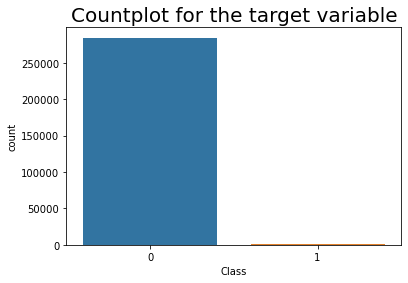

In [6]:
sns.countplot(data = df, x = 'Class')
plt.title('Countplot for the target variable',size = 20)
plt.show()

The minority class i.e., the fraudulent cases account for only 492 transactions or 0.172% of the total transactions.

The dataset is heavily imbalanced and we need to approach it accordingly.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


For columns other than the 'Time' column, all seems to be in a similar range of values.

In [8]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values found in any column

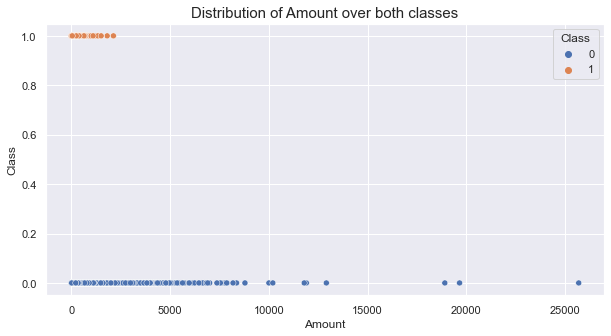

In [9]:
sns.set()
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(data = df, x = 'Amount', y = 'Class',hue = 'Class')
plt.title('Distribution of Amount over both classes',size = 15)
plt.show()

We observe that the frauds have occurred primarily for small amounts and there are some obvious outliers in the valid transactions class.

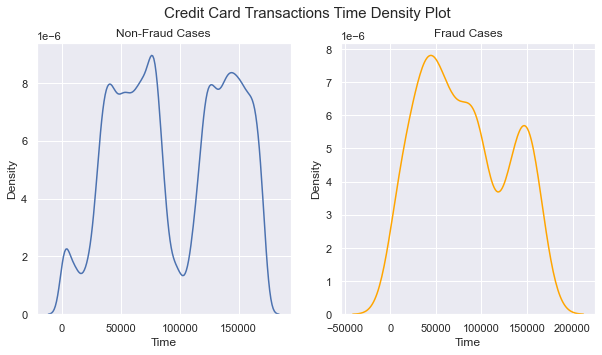

In [10]:
fig, ax = plt.subplots(1,2)
sns.kdeplot(data = df[df['Class']==0], x = 'Time',ax = ax[0])
sns.kdeplot(data = df[df['Class']==1], x = 'Time',ax = ax[1],color = 'orange')
ax[0].title.set_text('Non-Fraud Cases')
ax[1].title.set_text('Fraud Cases')
plt.suptitle('Credit Card Transactions Time Density Plot',size = 15)
plt.show()

Fraudulent transactions have a more even distribution than valid transactions i.e., these are more equaly distributed in time.

Let's look into the aggregated values of transaction count and amount per hour for both classes.

We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [11]:
df['Hour'] = df['Time'].apply(lambda x : np.floor(x/3600))

#creating a temporary dataframe
temp = df.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','mean','count','sum','var','median']).reset_index()
temp = pd.DataFrame(temp)
temp.columns = ['Hour','Class','min_amount','max_amount','mean_amount','Transactions','sum','var','median_amount']
temp.head()

,Hour,Class,min_amount,max_amount,mean_amount,Transactions,sum,var,median_amount
0,0.0,0,0.0,7712.43,64.774772,3961,256572.87,45615.821201,12.990
1,0.0,1,0.0,529.00,264.500000,2,529.00,139920.500000,264.500
2,1.0,0,0.0,1769.69,65.826980,2215,145806.76,20053.615770,22.820
3,1.0,1,59.0,239.93,149.465000,2,298.93,16367.832450,149.465
4,2.0,0,0.0,4002.88,68.803466,1555,106989.39,45355.430437,17.900


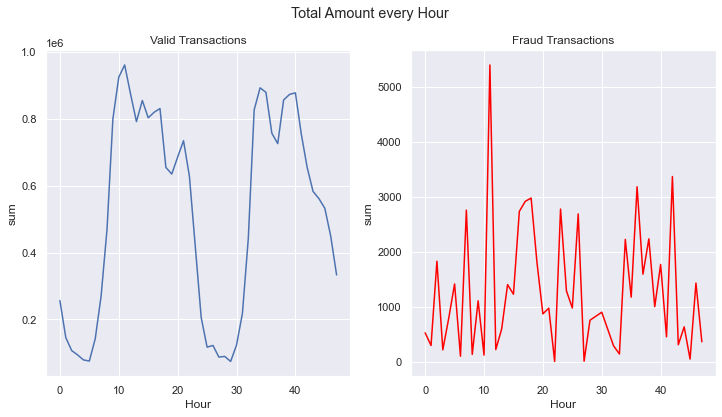

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="sum", data=temp.loc[temp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="sum", data=temp.loc[temp.Class==1], color="red")
ax1.title.set_text('Valid Transactions')
ax2.title.set_text('Fraud Transactions')
plt.suptitle("Total Amount every Hour")
plt.show()

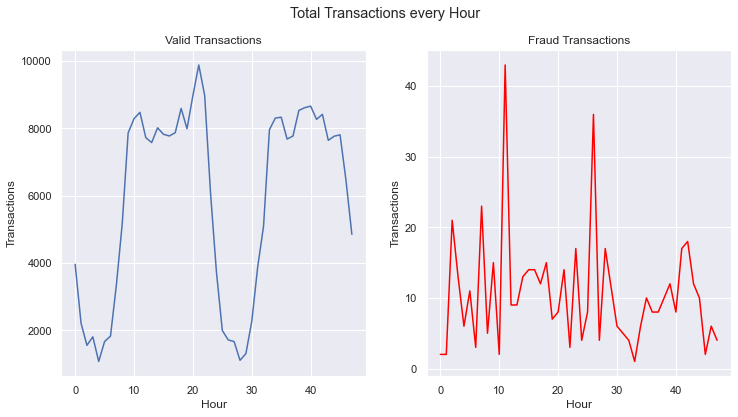

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=temp.loc[temp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=temp.loc[temp.Class==1], color="red")
ax1.title.set_text('Valid Transactions')
ax2.title.set_text('Fraud Transactions')
plt.suptitle("Total Transactions every Hour")
plt.show()

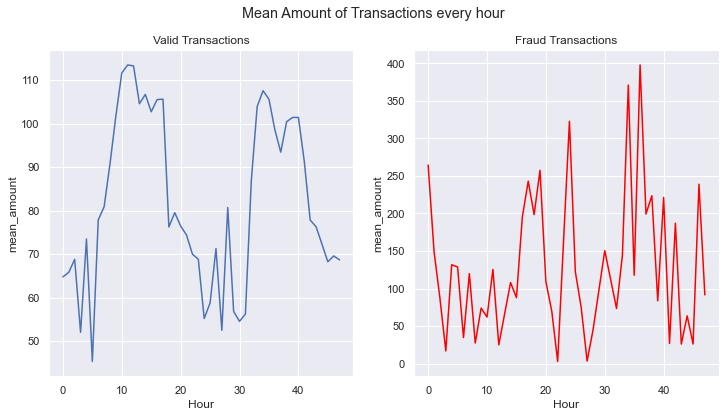

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="Hour", y="mean_amount", data=temp.loc[temp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="mean_amount", data=temp.loc[temp.Class==1], color="red")
ax1.title.set_text('Valid Transactions')
ax2.title.set_text('Fraud Transactions')
plt.suptitle("Mean Amount of Transactions every hour")
plt.show()

In [15]:
df[df['Class']==0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
df[df['Class']==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

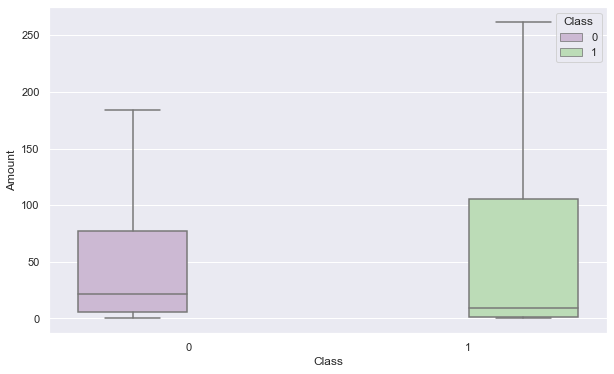

In [17]:
plt.figure(figsize = (10,6))
s = sns.boxplot(x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

The valid transaction have a smaller mean value, larger Q1, smaller Q2 and Q3 and larger outliers; fraudulent transactions have a smaller Q1, larger mean and smaller outliers.

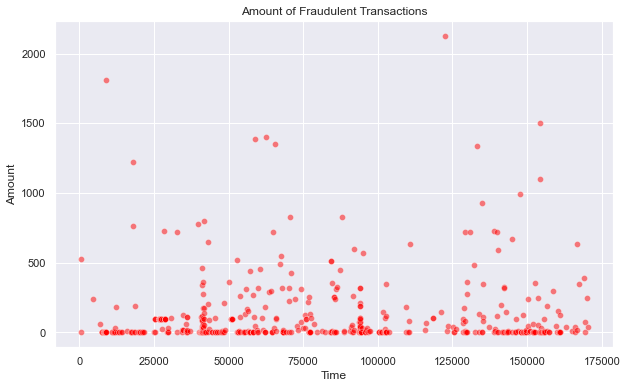

In [18]:
fraud = df.loc[df['Class'] == 1]
plt.figure(figsize = (10,6))
sns.scatterplot(data = fraud, x = 'Time', y = 'Amount', color = 'red',alpha = 0.5)
plt.title('Amount of Fraudulent Transactions')
plt.show()

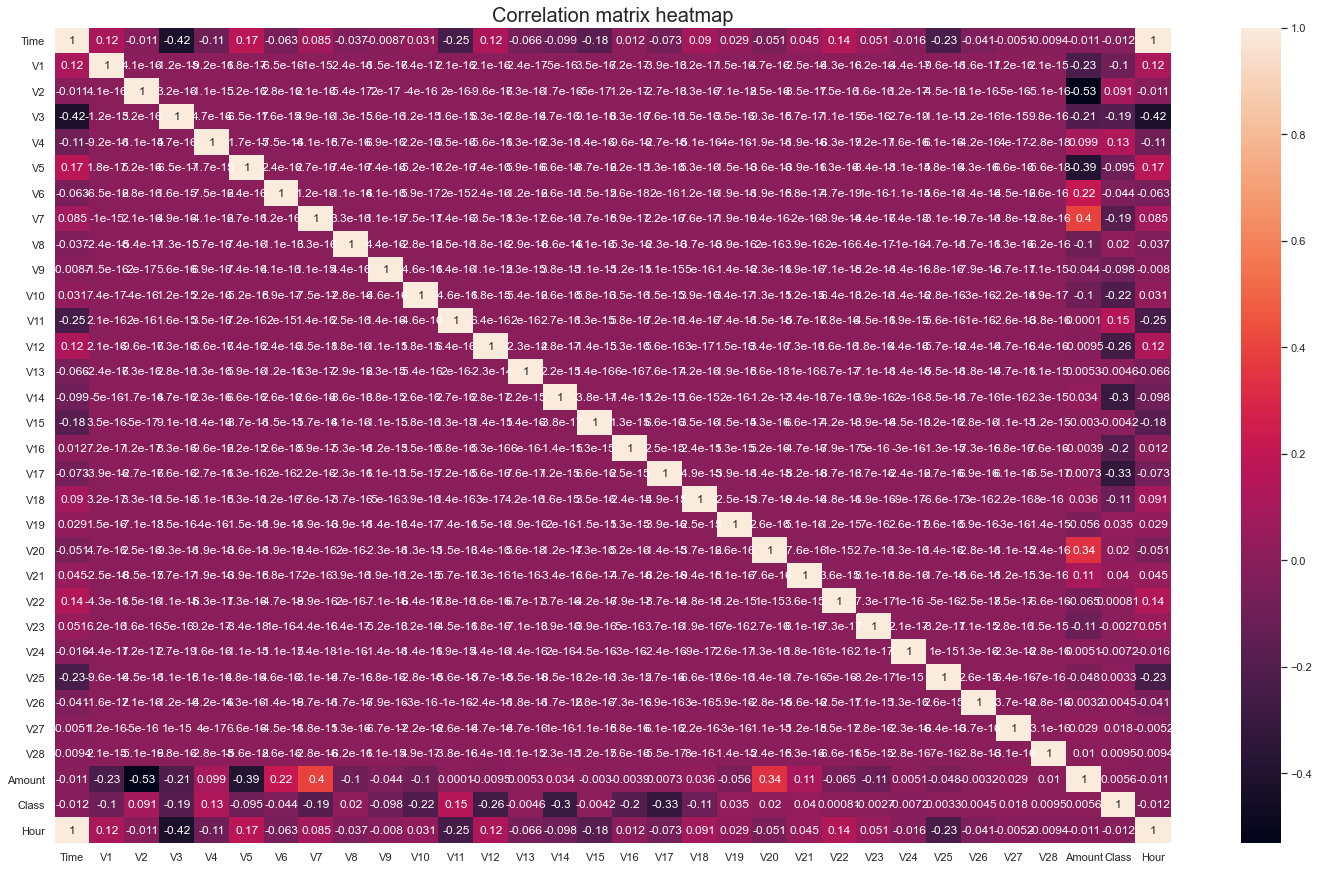

In [19]:
#checking if there is any correlation between columns
plt.rcParams['figure.figsize'] = (25,15)
correlation = df.corr()
sns.heatmap(correlation,annot = True)
plt.title('Correlation matrix heatmap',size = 20)
plt.show()

There is very little to no correlation amongst columns

### Splitting the data

In [20]:
X = df.drop(['Class','Hour'],axis = 1)
y = df.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [21]:
X_train.shape

(227845, 30)

In [22]:
y_train.shape

(227845,)

In [23]:
y_test.shape

(56962,)

In [24]:
X_test.shape

(56962, 30)

In [25]:
import warnings
warnings.filterwarnings('ignore')

### Approach: Cost Sensitive Learning

#### Random Forest Classifier

In [26]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 0,n_jobs = 4,class_weight = 'balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

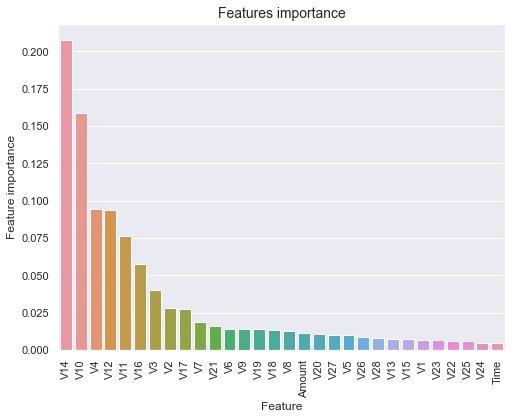

In [27]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (8,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

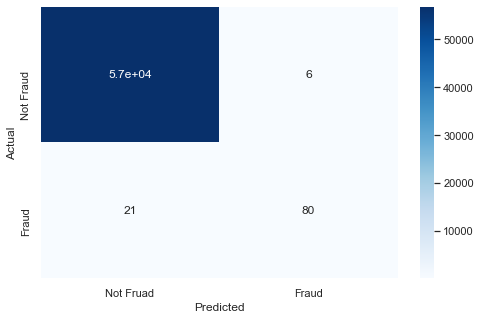

In [28]:
#confusion matrix
plt.figure(figsize = (8,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.79      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
print("Precision: ", round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall: ", round(recall_score(y_test, y_pred)*100,2),"%")
print("F1: ", round(f1_score(y_test, y_pred)*100,2),"%")

Precision:  93.02 %
Recall:  79.21 %
F1:  85.56 %


We hardly get any False Positives but about 20% actual Fraud cases could not be identified correctly.

### Logistic Regression Model

In [42]:
#using different weights for different classes using class_weight parameter
logReg = LogisticRegression(class_weight = 'balanced')

logReg.fit(X_train, y_train)

log_y_pred = logReg.predict(X_test)

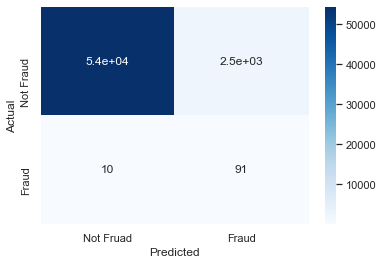

In [43]:
#confusion matrix
plt.figure(figsize = (6,4))
cm = confusion_matrix(y_test,log_y_pred)
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

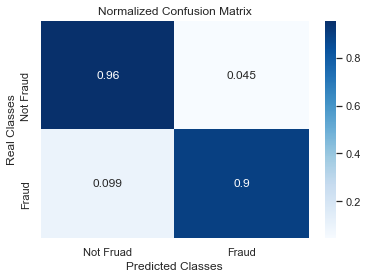

In [44]:
#let's normalise the confusion matrix
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])

norm_cfn_matrix = cm * cfn_norm_matrix

plt.figure(figsize = (6,4))
sns.heatmap(norm_cfn_matrix,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues',annot = True)
plt.title('Normalized Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [45]:
print(classification_report(y_test,log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.03      0.90      0.07       101

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



Let's try changing the threshold of class separation in logistic regression.

For doing that, we will need the probability values of each observation belonging to either class

In [46]:
yhat = logReg.predict_proba(X_test)

#taking only the probability of fraud
yhat_positive = yhat[:,1]

In [47]:
targets = y_test
targets = pd.DataFrame(targets, columns = ['Class'])
targets.head()

,Class
183484,0
255448,0
244749,0
63919,0
11475,0


In [48]:
targets['predicted_class'] = y_pred
targets['prob_of_fraud'] = yhat_positive
targets.head()

,Class,predicted_class,prob_of_fraud
183484,0,0,0.097409
255448,0,0,0.047777
244749,0,0,0.039807
63919,0,0,0.444532
11475,0,0,0.326174


In [31]:
from sklearn.metrics import roc_curve,precision_recall_curve,roc_auc_score,auc

In [49]:
#checking roc curves
fpr, tpr, thresholds = roc_curve(targets.Class, targets.prob_of_fraud)

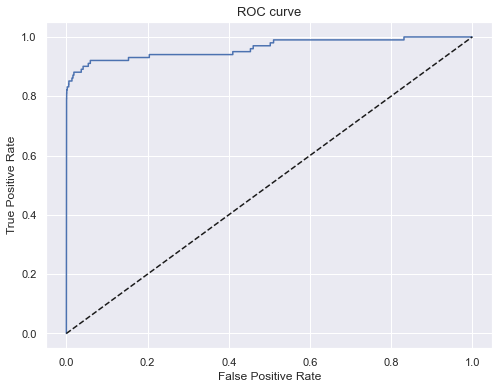

In [50]:
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [51]:
#checking area under the roc curvre
roc_auc = roc_auc_score(targets.Class, targets.prob_of_fraud)
roc_auc

0.9624294854170174

Let's determine the optimum threshold value

In [52]:
#Using Youden's J statistic to determine optimum threshold
J = tpr - fpr
index = np.argmax(J)
best_thresh = thresholds[index]
print("Best Threshold is : ",best_thresh)

Best Threshold is :  0.71085543247417


In [53]:
targets['predicted_class'] = np.where(targets['prob_of_fraud']>best_thresh,1,0)

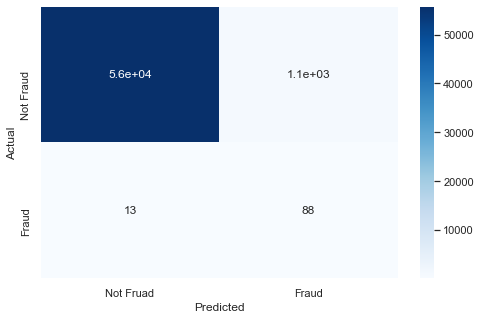

In [54]:
#confusion matrix
plt.figure(figsize = (8,5))
cm = confusion_matrix(targets.Class,targets['predicted_class'])
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

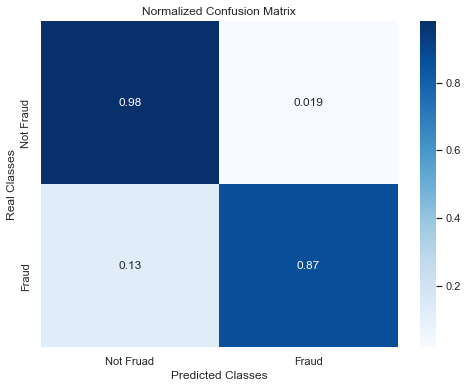

In [55]:
#let's normalise the confusion matrix
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])

norm_cfn_matrix = cm * cfn_norm_matrix

plt.figure(figsize = (8,6))
sns.heatmap(norm_cfn_matrix,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues',annot = True)
plt.title('Normalized Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [56]:
print(classification_report(targets.Class,targets['predicted_class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.87      0.14       101

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



For a very minor decrease in recall value, we have been able to improve the f1-score significantly using the optimal threshold value instead of the default 0.5.

### Another approach: Balancing the training dataset

In [67]:
#normalising the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in X_train:
    scaler = StandardScaler()
    X_train[i] = scaler.fit_transform(X_train[i].values.reshape(-1,1))
    X_test[i] = scaler.transform(X_test[i].values.reshape(-1,1))

In [68]:
#Balancing with Borderline_SMOTE
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 0)
X_train, y_train = borderlineSMOTE.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

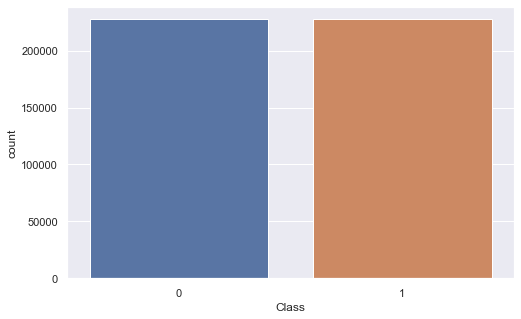

In [69]:
#data after over-sampling
plt.figure(figsize = (8,5))
sns.countplot(x = y_train)

#### Random Forest Classifier

In [85]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 0,n_jobs = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

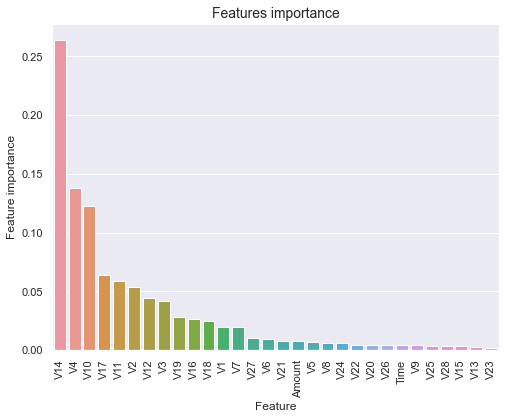

In [86]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (8,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

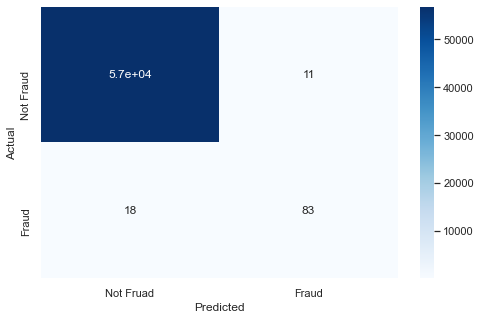

In [87]:
#confusion matrix
plt.figure(figsize = (8,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.82      0.85       101

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
print("Precision: ", round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall: ", round(recall_score(y_test, y_pred)*100,2),"%")
print("F1: ", round(f1_score(y_test, y_pred)*100,2),"%")

Precision:  88.3 %
Recall:  82.18 %
F1:  85.13 %


Slightly better performance than in the Cost-sensitive approach using Random Forests.

#### Logistic Regression

In [70]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

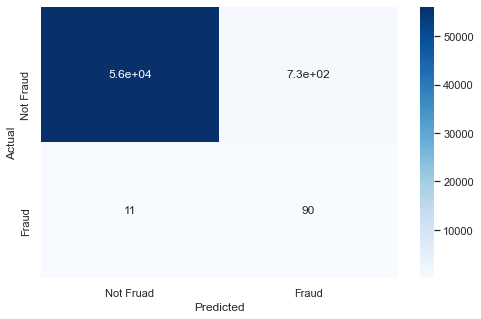

In [71]:
#confusion matrix
plt.figure(figsize = (8,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

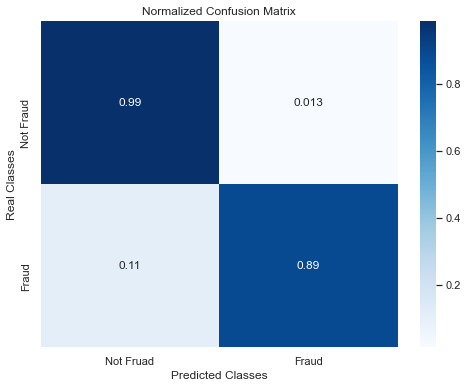

In [72]:
#let's normalise the confusion matrix
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])

norm_cfn_matrix = cm * cfn_norm_matrix

plt.figure(figsize = (8,6))
sns.heatmap(norm_cfn_matrix,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues',annot = True)
plt.title('Normalized Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.11      0.89      0.20       101

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



Let's try changing the threshold of class separation in logistic regression.

For doing that, we will need the probability values of each observation belonging to either class

In [74]:
yhat = log.predict_proba(X_test)

#taking only the probability of fraud
yhat_positive = yhat[:,1]

In [75]:
targets_over = y_test
targets_over = pd.DataFrame(targets, columns = ['Class'])
targets_over.head()

,Class
183484,0
255448,0
244749,0
63919,0
11475,0


In [76]:
targets_over['predicted_class'] = y_pred
targets_over['prob_of_fraud'] = yhat_positive
targets_over.head()

,Class,predicted_class,prob_of_fraud
183484,0,0,0.010502
255448,0,0,0.009304
244749,0,0,0.001774
63919,0,0,0.000531
11475,0,0,0.019736


In [77]:
#checking roc curves
fpr, tpr, thresholds = roc_curve(targets_over.Class, targets_over.prob_of_fraud)

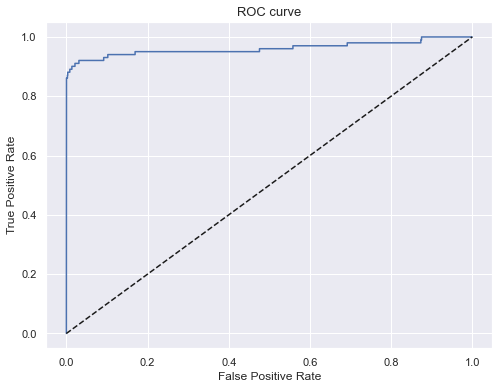

In [78]:
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [79]:
#checking area under the roc curvre
roc_auc = roc_auc_score(targets_over.Class, targets_over.prob_of_fraud)
roc_auc

0.961100989541806

Let's determine the optimum threshold value

In [80]:
#Using Youden's J statistic to determine optimum threshold
J = tpr - fpr
index = np.argmax(J)
best_thresh = thresholds[index]
print("Best Threshold is : ",best_thresh)

Best Threshold is :  0.17200956112035265


In [81]:
targets_over['predicted_class'] = np.where(targets_over['prob_of_fraud']>best_thresh,1,0)

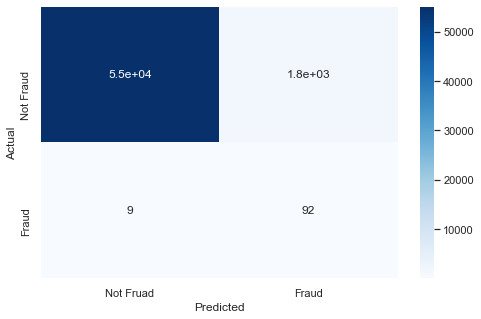

In [82]:
#confusion matrix
plt.figure(figsize = (8,5))
cm = confusion_matrix(targets_over.Class,targets_over['predicted_class'])
sns.heatmap(cm, annot = True,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

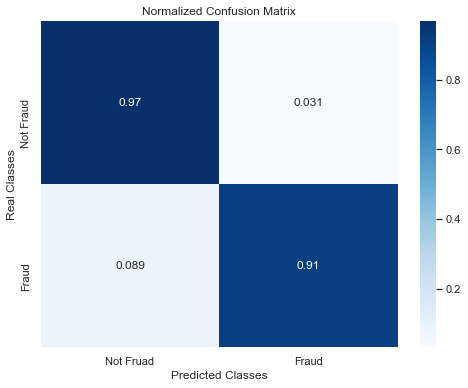

In [83]:
#let's normalise the confusion matrix
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])

norm_cfn_matrix = cm * cfn_norm_matrix

plt.figure(figsize = (8,6))
sns.heatmap(norm_cfn_matrix,yticklabels=["Not Fraud","Fraud"],xticklabels=["Not Fruad", "Fraud"],cmap = 'Blues',annot = True)
plt.title('Normalized Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [84]:
print(classification_report(targets_over.Class,targets_over['predicted_class']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.91      0.09       101

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



We were able to improve on the recall score but the amount of false positives were more than doubled by using improved threshold instead of default 0.5.

Still, this is the best result we have obtained so far considering the recall score.